# Eigenvalues

In [1]:
using Plots,LinearAlgebra,LaTeXStrings
default(label="")

:::{attention}
For the rest of the chapter, we deal with square matrices only.
:::

The importance and usefulness of the following definition won't be apparent for a while.

```{index} ! eigenvalue, ! eigenvector
```

(definition-linalg-eigen)=
::::{proof:definition} Eigenvalue and eigenvector

Suppose $\bfA\in\cmn{n}{n}$. If there exist a number $\lambda$ and a nonzero vector $\bfv$ such that

```{math}
\bfA \bfv = \lambda \bfv,
```

then $\lambda$ is an **eigenvalue** of $\bfA$ with associated **eigenvector** $\bfv$.
::::

If you think of $\bfA$ as acting on vectors, then an eigenvector is a direction in which the action of $\bfA$ is one-dimensional.

For example, let $\bfA = -\dfrac{1}{6}\twomat{1}{5}{10}{-4}$. For any value of $\theta$, $\bfx = [\cos\theta,\sin\theta]$ is a vector in $\real^2$ in the direction of $\theta$. If we choose the direction randomly, then there is no special relationship between $\bfx$ (blue) and $\bfA\bfx$ (red). But in two special directions, the result $\bfA\bfx$ is parallel to $\bfx$. For these directions, $\bfx$ is an eigenvector, and the corresponding eigenvalue is either $1.5$ or $-1$.

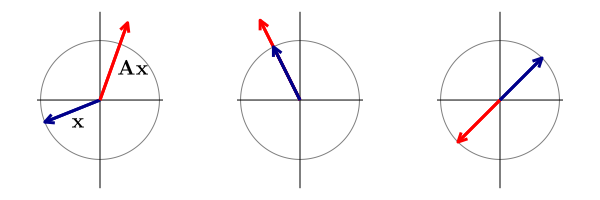

In [2]:
V = [-2 1;4 1]
D = [1.5 0;0 -1]
A = V*D/V

plot(size=(600,200),layout=(1,3),frame=:zerolines,aspect_ratio=1,xticks=[],yticks=[],xlims=[-1,1],ylims=1.4*[-1,1])
t = (0:360)*2pi/360

plot!(cos.(t),sin.(t),color=RGBA(0,0,0,.5),l=1,subplot=1)
x = normalize([-1,-0.4])
y = A*x
plot!([0,x[1]],[0,x[2]],color=:darkblue,l=3,arrow=true,subplot=1)
annotate!(x[1]/2+.1,x[2]/2-0.2,L"\mathbf{x}",color=:darkblue,subplot=1)
plot!([0,y[1]],[0,y[2]],color=:red,l=3,arrow=true,subplot=1)
annotate!(y[1]/2+.33,y[2]/2-0.1,L"\mathbf{Ax}",color=:red,subplot=1)

plot!(cos.(t),sin.(t),color=RGBA(0,0,0,.5),l=1,subplot=2)
x = normalize([-2,4])
y = A*x
plot!([0,y[1]],[0,y[2]],color=:red,l=3,arrow=true,subplot=2)
plot!([0,x[1]],[0,x[2]],color=:darkblue,l=3,arrow=true,subplot=2)

plot!(cos.(t),sin.(t),color=RGBA(0,0,0,.5),l=1,subplot=3)
x = normalize([1,1])
y = A*x
plot!([0,y[1]],[0,y[2]],color=:red,l=3,arrow=true,subplot=3)
plot!([0,x[1]],[0,x[2]],color=:darkblue,l=3,arrow=true,subplot=3)

## Eigenspaces

An eigenvalue is a clean, well-defined target. Eigenvectors are a little slipperier. For starters, if $\bfA\bfv=\lambda\bfv$, then

```{math}
\bfA(c\bfv) = c(\bfA\bfv)=c(\lambda\bfv)=\lambda(c\bfv).
```

```{note}
Every nonzero multiple of an eigenvector is also an eigenvector for the same eigenvalue.
```

But there can be even more ambiguity.

::::{proof:example}
Let $\meye$ be an identity matrix. Then $\meye\bfx=\bfx$ for any vector $\bfx$, so every nonzero vector is an eigenvector!
::::

Fortunately we already have the tools we need to describe a more robust target, based on the very simple reformulation

```{math}
\bfzero=\bfA\bfv-\lambda\bfv=(\bfA-\lambda\meye)\bfv.
```

The requirement of an eigenvector to be nonzero, combined with {numref}`Theorem {number} <theorem-FTLA1>`, leads to the following crucial conclusion.

(theorem-eigenvalues-singular)=
::::{proof:theorem}
$\lambda$ is an eigenvalue of $\bfA$ if and only if $\bfA-\lambda\meye$ is singular.
::::

```{index} ! eigenspace
```

(definition-linalg-eigenspace)=
::::{proof:definition} Eigenspace
Let $\lambda$ be an eigenvalue of $\bfA$. The **eigenspace** associated with $\lambda$ is the null space of $(\bfA-\lambda\meye)\bfx$.
::::

Eigenspaces, unlike eigenvectors, are uniquely associated with their eigenvalues. We have to be a bit careful, though, because we usually express such spaces using basis vectors, and those bases are *not* themselves unique. It's also common in problems and discussions to use eigenvectors and silently ignore the nonuniqueness.

## Properties

(theorem-eigenvalues-properties)=
::::{proof:theorem} 
1. If $\lambda$ is an eigenvalue of $\bfA$, then $c\lambda$ is an eigenvalue of $c\bfA$ with the same eigenvectors.
2. If $\lambda$ is an eigenvalue of $\bfA$, then $\lambda-c$ is an eigenvalue of $\bfA-c\meye$ with the same eigenvectors.
3. If $\bfA$ is a triangular square matrix, then its eigenvalues are its diagonal elements.
4. A matrix is singular if and only if $0$ is among its eigenvalues.
::::

Formally for part 3 of the theorem, a matrix is **upper triangular** if $A_{ij}=0$ whenever $i>j$, and it is **lower triangular** if $A_{ij}=0$ whenever $i<j$.

(example-eigenvalues-triangular)=
::::{proof:example} 
Find the eigenvalues and eigenspaces of 
$\bfA = \begin{bmatrix} -2 & 4 & 0 \\ 0 & 1 & -3 \\ 0 & 0 & -2 \end{bmatrix}.$

:::{dropdown} Solution
Because the matrix is upper triangular, we see right away that its eigenvalues are $\lambda_1=-2$ and $\lambda_2=1$. The eigenspace for $\lamnda_1$ is the null space of 

$$
\bfA - (-2)\meye = \begin{bmatrix} 0 & 4 & 0 \\ 0 & 3 & -3 \\ 0 & 0 & 0 \end{bmatrix}
\quad \overset{\text{RREF}}{\Longrightarrow} \quad 
\begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix}.
$$

Since the solution of a homogeneous system with this matrix is $x_1=t$, $x_2=x_3=0$, the basis for this eigenspace is thus $[1,0,0]$. The eigenspace for $\lamnda_2$ is the null space of 

$$
\bfA - (1)\meye = \begin{bmatrix} -3 & 4 & 0 \\ 0 & 0 & -3 \\ 0 & 0 & -3 \end{bmatrix}
\quad \overset{\text{RREF}}{\Longrightarrow} \quad 
\begin{bmatrix} 1 & -\frac{4}{3} & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix}.
$$

A basis for this eigenspace is $[\frac{4}{3},1,0]$, though a more convenient choice is $[4,3,0]$.
:::
::::